In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y=mnist["data"],mnist["target"]
X.shape


(70000, 784)

In [3]:
y.shape

(70000,)

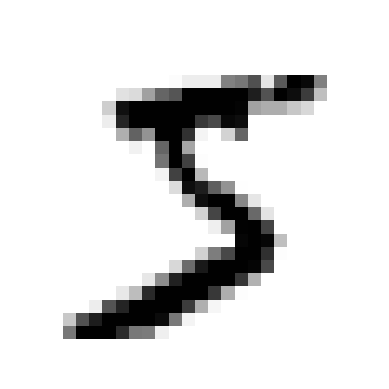

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [5]:
y[0]

'5'

In [6]:
import numpy as np
y=y.astype(np.uint8)

In [7]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [10]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")
    plt.axis('off')

In [11]:
def plot_digits(instances,image_per_row=10,**options):
    size=28
    image_per_row=min(len(instances),image_per_row)
    n_rows=(len(instances)-1)//image_per_row+1
    n_empty=n_rows*image_per_row-len(instances)
    padded_instances=np.concatenate([instances,np.zeros((n_empty,size*size))],axis=0)
    image_grid=padded_instances.reshape((n_rows,image_per_row,size,size))
    big_image=image_grid.transpose(0,2,1,3).reshape(n_rows*size,image_per_row*size)
    plt.imshow(big_image,cmap=mpl.cm.binary,**options)
    plt.axis('off')

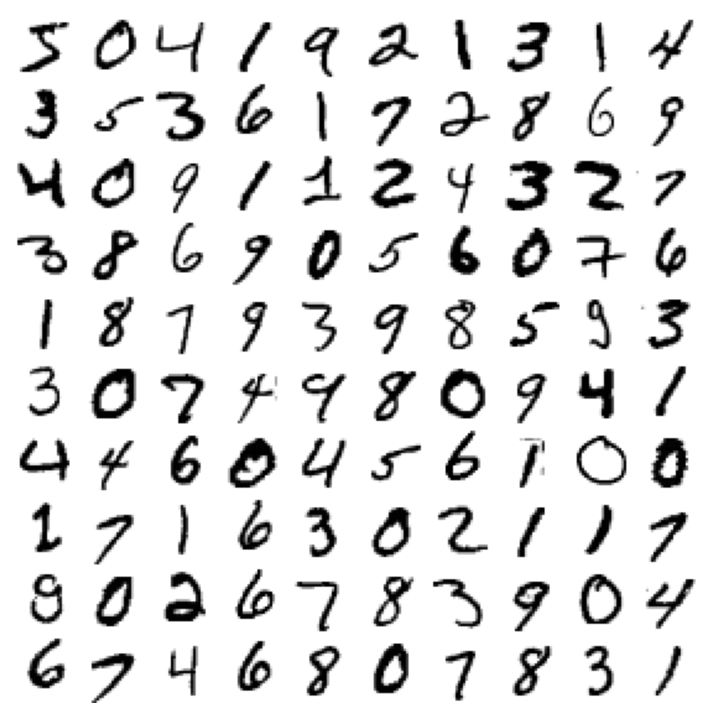

In [12]:
plt.figure(figsize=(9,9))
example_images=X[:100]
plot_digits(example_images,image_per_row=10)
plt.show()

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_folds=X_train[test_index]
    y_test_fold=y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))


0.9669
0.91625
0.96785


In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [16]:
from sklearn.model_selection import cross_val_score
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

**CONFUSION MATRIX**

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

*/PERFECT CLASSIFIER/*

In [20]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [22]:
cm=confusion_matrix(y_train_5,y_train_pred)
cm[1,1]/(cm[0,1]+cm[1,1])

0.8370879772350012

In [23]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [24]:
cm[1,1]/(cm[1,0]+cm[1,1])

0.6511713705958311

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [26]:
cm[1,1]/(cm[1,1]+(cm[1,0]+cm[0,1])/2)

0.7325171197343847

**PRECISION RECALL TRADEOFF**

In [27]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [28]:
threshold=0
y_some_digit_predict=(y_scores>threshold)
y_some_digit_predict

array([ True])

In [29]:
threshold=8000
y_some_digit_predict=(y_scores>threshold)
y_some_digit_predict

array([False])

In [30]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [31]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [32]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],'g-',label="Recall")
    plt.legend(loc="center right",fontsize=16)
    plt.xlabel("Threshold",fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
recall_90_precision=recalls[np.argmax(precisions>=0.90)]
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]


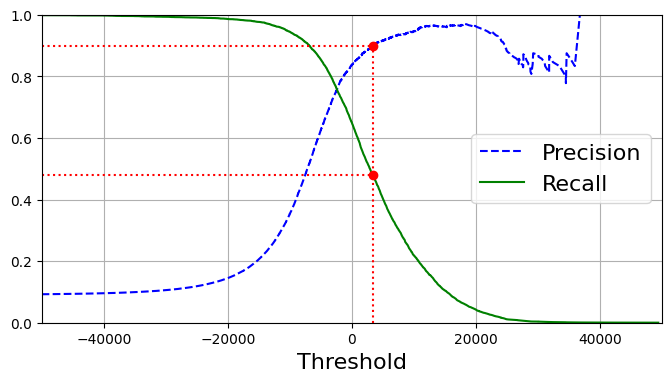

In [33]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision,threshold_90_precision],[0.,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[0.9,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")
plt.plot([threshold_90_precision],[0.9],"ro")
plt.plot([threshold_90_precision],[recall_90_precision],"ro")
plt.show()

In [34]:
(y_train_pred==(y_scores>0)).all()

True

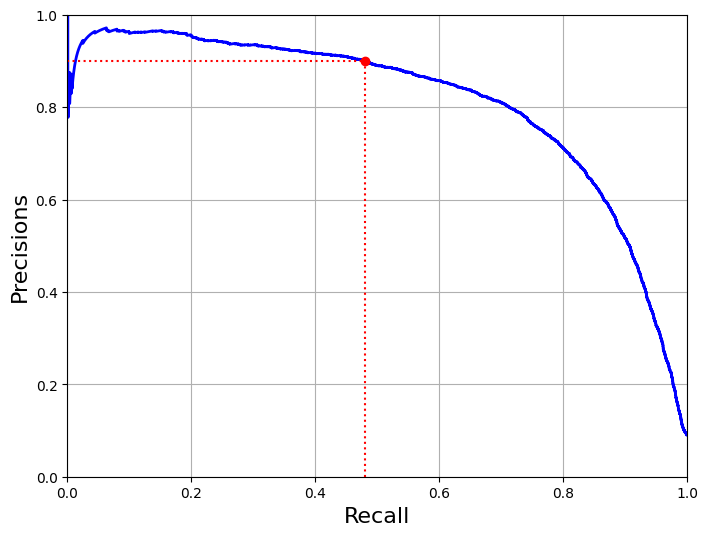

In [35]:
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions,"b-",linewidth=2)
    plt.xlabel("Recall",fontsize=16)
    plt.ylabel("Precisions",fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
plt.plot([recall_90_precision,recall_90_precision],[0.,0.9],'r:')
plt.plot([0.0,recall_90_precision],[0.9,0.9],'r:')
plt.plot([recall_90_precision],[0.9],"ro")
plt.show()

In [36]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]
threshold_90_precision

3370.0194991439557

In [37]:
y_train_pred_90=(y_scores>=threshold_90_precision)


In [38]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [39]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

**ROC CURVE**(receiver operating characteristic)

In [40]:
#plots TPR vs FPR(1-TNR(specificity))
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

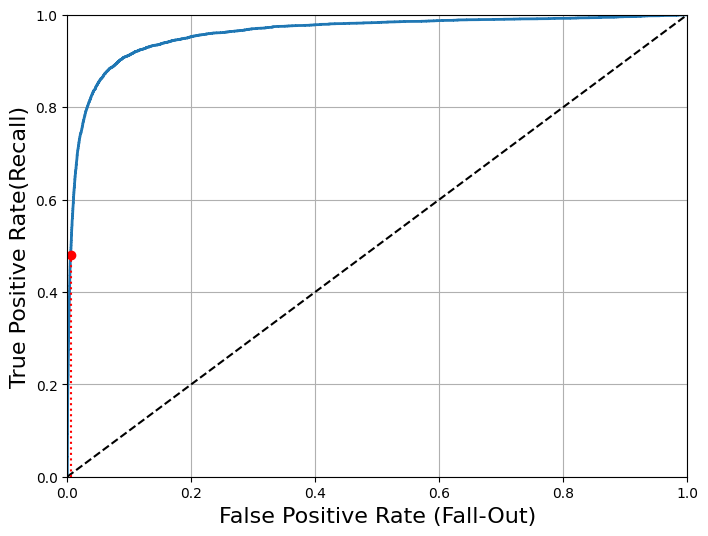

In [41]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (Fall-Out)',fontsize=16)
    plt.ylabel('True Positive Rate(Recall)',fontsize=16)
    plt.grid(True)
plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
fpr_90=fpr[np.argmax(tpr>=recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],"r:")
plt.plot([fpr_90],[recall_90_precision],'ro')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [44]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_5,y_scores_forest)

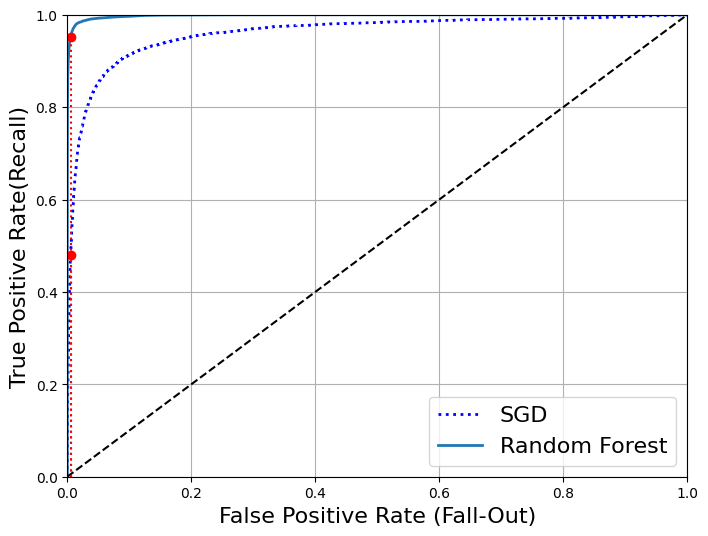

In [45]:
recall_forest=tpr_forest[np.argmax(fpr_forest>=fpr_90)]
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,"b:",linewidth=2,label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],'r:')
plt.plot([fpr_90],[recall_90_precision],"ro")
plt.plot([fpr_90,fpr_90],[0.,recall_forest],'r:')
plt.plot([fpr_90],[recall_forest],'ro')
plt.grid(True)
plt.legend(loc='lower right',fontsize=16)
plt.show()

In [46]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [47]:
y_train_pred_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
precision_score(y_train_5,y_train_pred_forest)

0.9905083315756169

In [48]:
recall_score(y_train_5,y_train_pred_forest)

0.8662608374838591

**MULTICLASS CLASSIFICATION**

o OvR: one-versus-rest(gets decision score from each classifier for that image and we select the class with highest score)

o OvO: one-versus-one(for n classes, n*(n-1)/2 classifiers would be required)

In [49]:
from sklearn.svm import SVC
svm_clf=SVC(gamma='auto',random_state=42)
svm_clf.fit(X_train[:1000],y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [50]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [51]:
np.argmax(some_digit_scores)

5

In [52]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [53]:
svm_clf.classes_[5]

5

In [54]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(gamma='auto',random_state=42))
ovr_clf.fit(X_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [55]:
len(ovr_clf.estimators_)

10

In [56]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [57]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [58]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

**ERROR ANALYSIS**

In [60]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

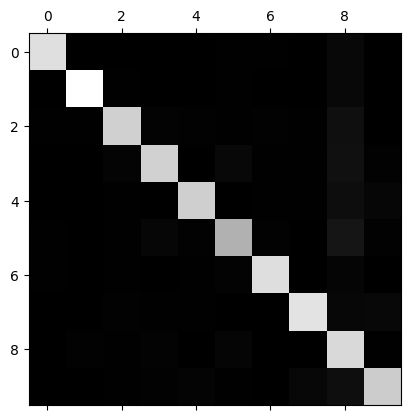

In [61]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [62]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

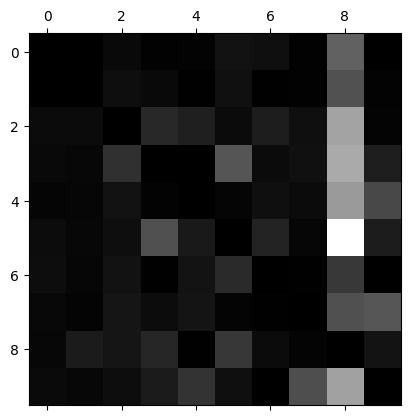

In [63]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

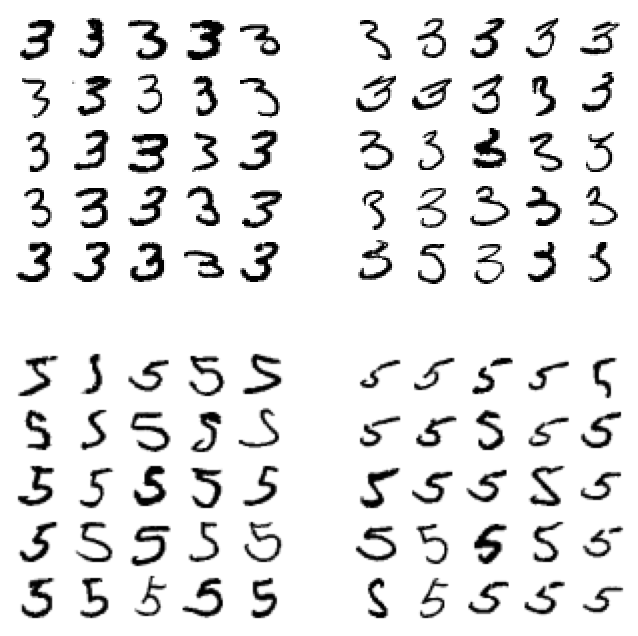

In [64]:

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], image_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], image_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], image_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], image_per_row=5)
plt.show()

**MULTILABEL CLASSIFICATION**

In [65]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [66]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [67]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

**MULTIOUTPUT CLASSIFICATION**


In [68]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

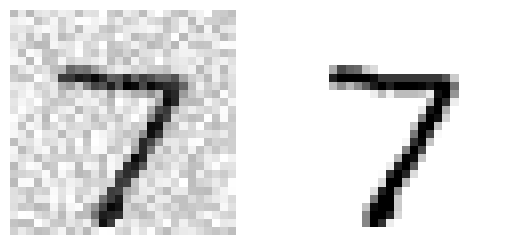

In [69]:
some_index=0
plt.subplot(121);plot_digit(X_test_mod[some_index])
plt.subplot(122);plot_digit(y_test_mod[some_index])
plt.show()

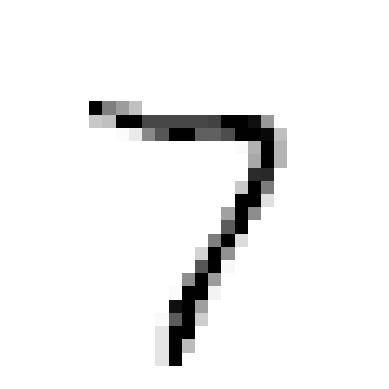

In [70]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [71]:
from sklearn.dummy import DummyClassifier
dmy_clf=DummyClassifier(strategy="prior")
y_probas_dmy=cross_val_predict(dmy_clf,X_train,y_train_5,cv=3,method="predict_proba")
y_scores_dmy=y_probas_dmy[:,1]

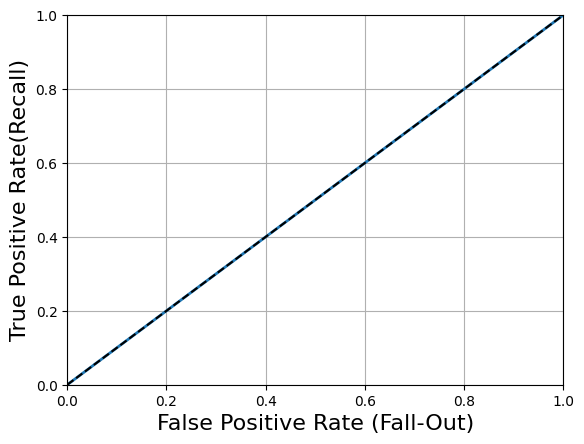

In [72]:
from sklearn.metrics import roc_curve
fprr,tprr,thresholdsr=roc_curve(y_train_5,y_scores_dmy)
plot_roc_curve(fprr,tprr)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(weights='distance',n_neighbors=4)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [74]:
y_knn_pred=knn_clf.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_knn_pred)

0.9714

C:\Users\hp\AppData\Local\Temp\ipykernel_15420\3264688998.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


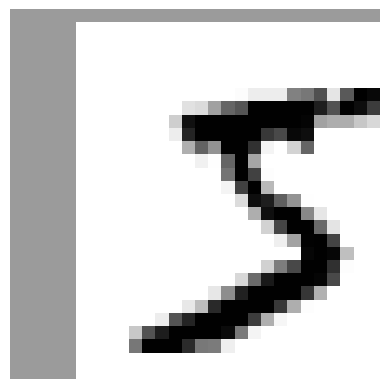

In [76]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array,dx,dy,new=0):
    return shift(digit_array.reshape(28,28),[dy,dx],cval=new).reshape(784)
plot_digit(shift_digit(some_digit,5,1,new=100))

In [77]:
X_train_expanded=[X_train]
y_train_expanded=[y_train]
for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
    shifted_images=np.apply_along_axis(shift_digit,axis=1,arr=X_train,dx=dx,dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)
X_train_expanded=np.concatenate(X_train_expanded)
y_train_expanded=np.concatenate(y_train_expanded)
X_train_expanded.shape,y_train_expanded.shape

((300000, 784), (300000,))

In [78]:
knn_clf.fit(X_train_expanded,y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [79]:
y_knn_expanded_pred=knn_clf.predict(X_test)

In [80]:
accuracy_score(y_test,y_knn_expanded_pred)

0.9763

In [81]:
ambiguous_digit=X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

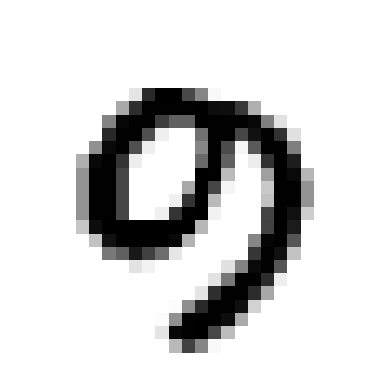

In [82]:
plot_digit(ambiguous_digit)

*QUESTION 1*

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid=[{'weights':["uniform","distance"],'n_neighbors':[3,4,5]}]
knn_clf=KNeighborsClassifier()
grid_search=GridSearchCV(knn_clf,param_grid,cv=5,verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  21.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  18.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  16.6s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  20.5s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  19.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  16.6s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  14.3s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  17.3s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  13.4s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  12.3s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  15.5s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [84]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [85]:
grid_search.best_score_

0.9716166666666666

In [86]:
from sklearn.metrics import accuracy_score
y_predict=grid_search.predict(X_test)
accuracy_score(y_test,y_predict)

0.9714

*Question 2*

DATA AUGMENTATION

In [87]:
from scipy.ndimage.interpolation import shift

C:\Users\hp\AppData\Local\Temp\ipykernel_15420\987197595.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [88]:
def shift_image(image,dx,dy):
    image=image.reshape((28,28))
    shifted_image=shift(image,[dy,dx],cval=0,mode="constant")
    return shifted_image.reshape([-1])

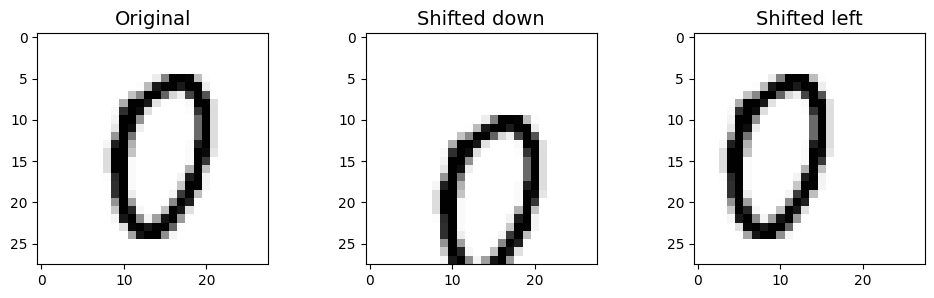

In [89]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [90]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [91]:

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [92]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [93]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [94]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9763